<a href="https://colab.research.google.com/github/ThamirisAdriano/iadt-deteccao-anomalias/blob/master/pca_quimica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Configurando a semente para reprodutibilidade e criando dados normais simulados (concentração de 3 compostos químicos)

In [4]:
np.random.seed(42)

composto_A = np.random.normal(loc=5.0, scale=1.0, size=100)
composto_B = np.random.normal(loc=3.0, scale=0.5, size=100)
composto_C = np.random.normal(loc=7.0, scale=1.5, size=100)

Combinando os compostos em um conjunto de dados e adicionando amostras anômalas (concentrações extremas ou incomuns)

In [6]:
dados_quimicos_normais = np.column_stack([composto_A, composto_B, composto_C])

dados_quimicos_anomalos = np.array([
    [12.0, 1.0, 3.0],  # Muito alta concentração de A, baixa de B, baixa de C
    [1.0, 0.5, 15.0]   # Muito baixa concentração de A, muito alta de C
])

Combinando os dados normais e anômalos e aplicando o PCA

In [7]:
dados_quimicos = np.vstack([dados_quimicos_normais, dados_quimicos_anomalos])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(dados_quimicos)

Recuperando a variância explicada e visualizando os dados reduzidos

Variância explicada por cada componente principal: [0.66557559 0.27529246]


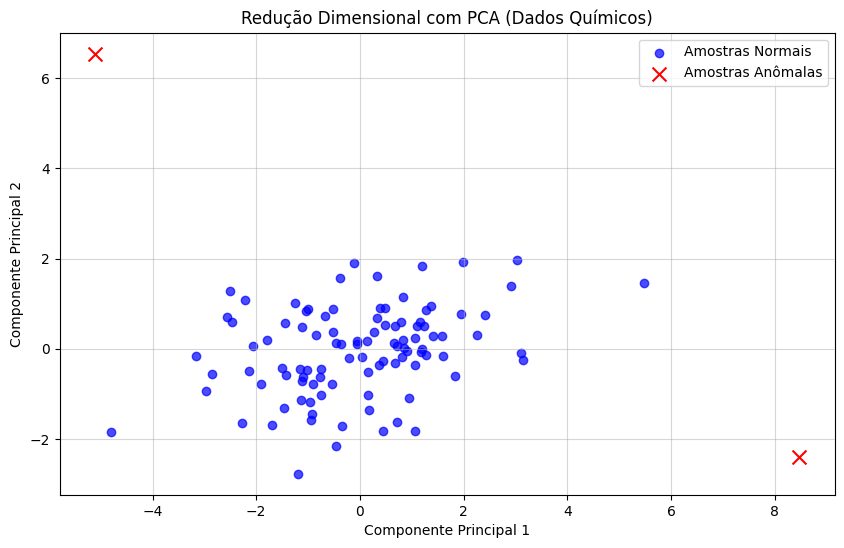

In [8]:

explained_variance = pca.explained_variance_ratio_
print(f"Variância explicada por cada componente principal: {explained_variance}")

plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:-2, 0], pca_result[:-2, 1], label='Amostras Normais', alpha=0.7, color='b')
plt.scatter(pca_result[-2:, 0], pca_result[-2:, 1], color='r', label='Amostras Anômalas', marker='x', s=100)
plt.title('Redução Dimensional com PCA (Dados Químicos)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(alpha=0.5)
plt.show()